# [**Reference**] Loading $\mu$-DSTs

## Imports

In [1]:
from __future__ import annotations

import os

from typing import Sequence, Any

In [2]:
import uproot
import pandas as pd

In [3]:
import oscana
import oscana.plotting as oscplt

In [4]:
%matplotlib inline

## Loading Data

In [5]:
oscana.load_env_file()

In [6]:
# Note: This method may not work in the future, as I intend to update Oscana to
#       make loading ROOT files easier and to hide the dependency on Uproot.

udst_uproot_import = [
    uproot.open(oscana.apply_wsl_prefix(os.environ["uDST_2010_MC_FD_R1_1"])),
    uproot.open(oscana.apply_wsl_prefix(os.environ["uDST_2010_MC_FD_R1_2"])),
    uproot.open(oscana.apply_wsl_prefix(os.environ["uDST_2010_MC_FD_R1_3"])),
    uproot.open(oscana.apply_wsl_prefix(os.environ["uDST_2010_MC_FD_R1_4"])),
    uproot.open(oscana.apply_wsl_prefix(os.environ["uDST_2010_MC_FD_R1_5"])),
    uproot.open(oscana.apply_wsl_prefix(os.environ["uDST_2010_MC_FD_R1_6"])),
]

## Helper Functions

In [7]:
def get_keys(
    udst_files: Sequence[Any],
    keys: Sequence[str],
    base_key: str = "s;1",
) -> pd.DataFrame:
    """\
    [Notebook only] Get keys from Uproot files and return them as a DataFrame.
    """

    df_list = []

    for udst_df in udst_files:
        df_list.append(
            pd.DataFrame(
                {
                    key.split("/")[-1]: udst_df[base_key][key].arrays(
                        library="np"
                    )[key.split("/")[-1]]
                    for key in keys
                }
            )
        )

    return pd.concat(df_list, axis=0).reset_index(drop=True)

## Building the `DataFrame`

In [11]:
df = get_keys(
    udst_uproot_import,
    [
        "s/isInFidVolCC",
        "s/isGoodDataQuality",
        "s/isGoodDataQualityRUN",
        "s/isGoodDataQualityCOIL",
        "s/isGoodDataQualityHV",
        "s/isGoodDataQualityGPS",
        "s/isInFidVolCC",
        "s/isGoodTrackReclamation",
        "s/energy",
    ],
)

## Plotting

In [12]:
# Note: Adding some rudiemntary cuts. A better method will be implemented to
#       Oscana in the future.

cuts = (
    df["isGoodDataQuality"]
    & df["isGoodDataQualityRUN"]
    & df["isGoodDataQualityCOIL"]
    & df["isGoodDataQualityHV"]
    & df["isGoodDataQualityGPS"]
    & df["isInFidVolCC"]
    & df["isGoodTrackReclamation"]
)

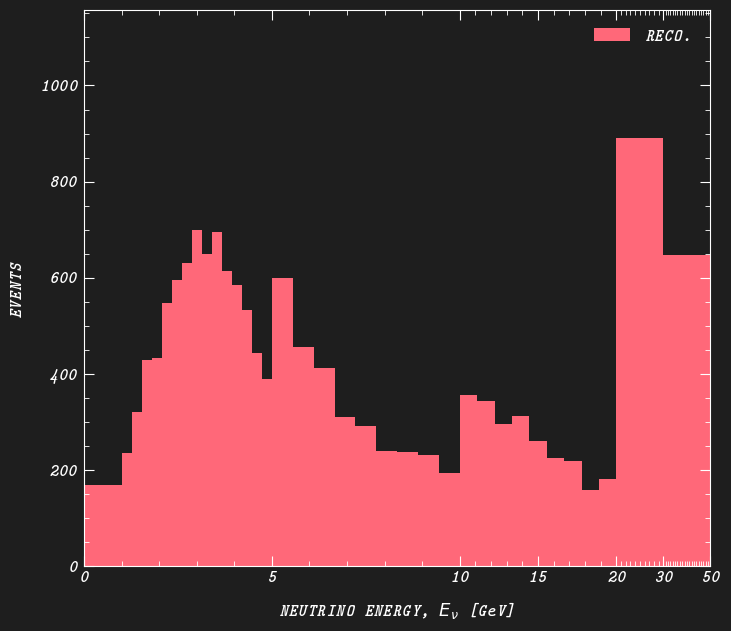

In [13]:
with oscplt.context(theme_name="slate"):
    fig, axs = oscplt.layout.grid()

    ax = axs[0]

    ax.hist(
        df[cuts]["energy"],
        bins=oscplt.MINOS_GUESSED_ENERGY_BINS,
        fill=True,
        label="Reco.".upper(),
    )

    ax.set_xlabel("Neutrino Energy, ".upper() + r"$E_\nu$ [GeV]")
    ax.set_ylabel("Events".upper())

    oscplt.modifiers.energy_axs_scale(ax)

    ax.legend()

    fig.tight_layout()